<a href="https://colab.research.google.com/github/CodeForeverZou/PostGraduate_Code/blob/master/TF%E6%A8%A1%E5%9E%8B%E6%9E%84%E5%BB%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 装载Google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!pwd

/content/drive/My Drive/Colab Notebooks


# 加载数据

## 由keras加载MNSIT

In [0]:
import tensorflow as tf
#import tensorflow.keras.layers
(mnist_images, mnist_labels), (X_test,Y_test) = tf.keras.datasets.mnist.load_data()
Y_test
#(Xf_train,Yf_train),(Xf_test,Yf_test)=tf.keras.datasets.fashion_mnist.load_data

11493376/11490434 [==============================] - 0s 0us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
#len(mnist_images)
from keras.utils import np_utils
#dataset = tf.data.Dataset.from_tensor_slices(
    #(tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),.cast(mnist_labels,tf.int64)))
X_test=X_test.reshape(10000,784).astype('float32')
X_test /= 255
y_test = np_utils.to_categorical(Y_test,10)
X_test.shape[0]
y_test.shape

Using TensorFlow backend.


(10000, 10)

In [0]:
#y_test = np_utils.to_categorical(Y_test,10)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 由TF加载MNIST

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
x_train=mnist.train.images
x_test=mnist.test.images
x_test /=255.0
y_train=mnist.train.labels
y_test=mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
len(y_train)
x_test.shape
y_test.shape
#len(y_test)

(10000, 10)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

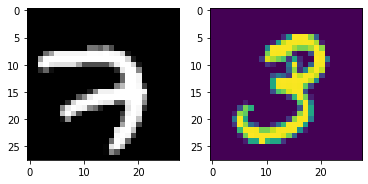

In [0]:
#from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(1,2,1)  #(row,col,index)
plt.imshow(np.reshape(x_train[0],[28,28]),cmap='Greys_r')
plt.subplot(1,2,2)
plt.imshow(np.reshape(x_train[1],[28,28]))
y_train[0]

## 由sklearn加载MNIST

In [0]:
from sklearn.datasets import fetch_mldata
mnist2=fetch_mldata("MNIST original")
X,Y=mnist2["data"],mnist2["target"]
X.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

# 定义模型
**问题：**

- Y_test为什么是[10000]，对于序列方式

- y_test为什么是[10000,10]，对于函数、子类化

**注意：**

keras.layers系列都有activation参数（可传'relu'，也可tf.nn.relu）

这与TensorFlow1.0中只能tf.nn.relu不同

## 序列方式

In [0]:
import numpy as np
keras_model=tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  #tf.keras.layers.Dense(32,input_shape=(784,)),
  #tf.keras.layers.Dense(10)
])

#keras_model(X_test[0])
keras_model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
#keras_model.fit(X_test,Y_test,epochs=3)
yy=[ np.argmax(i) for i in mnist.test.labels]
keras_model.fit(mnist.test.images,np.array(yy),epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 1s 66us/sample - loss: 2.1079 - acc: 0.4593
Epoch 2/3
10000/10000 [==============================] - 1s 61us/sample - loss: 1.4285 - acc: 0.6938
Epoch 3/3
10000/10000 [==============================] - 1s 60us/sample - loss: 0.9863 - acc: 0.7884


## 函数方式

In [0]:
tf_keras_model=tf.keras.Sequential()
tf_keras_model.add(tf.keras.layers.Dense(128, activation='relu'))
tf_keras_model.add(tf.keras.layers.Dense(10, activation='softmax'))

tf_keras_model.compile(optimizer='adam',loss='categorical_crossentropy',
          metrics=['accuracy'])
tf_keras_model.fit(X_test,y_test,epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 1s 65us/sample - loss: 0.5099 - acc: 0.8572
Epoch 2/3
10000/10000 [==============================] - 1s 61us/sample - loss: 0.2263 - acc: 0.9348
Epoch 3/3
10000/10000 [==============================] - 1s 59us/sample - loss: 0.1637 - acc: 0.9509


## 子类化方式
- 使用 tf.keras.datasets 获得数据集并预处理

- 使用 tf.keras.Model 和 tf.keras.layers 构建模型

- 构建模型训练流程，使用 tf.keras.losses 计算损失函数，并使用 tf.keras.optimizer 优化模型

- 构建模型评估流程，使用 tf.keras.metrics 计算评估指标



### 简单模式

In [0]:
import numpy as np
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.dense1=tf.keras.layers.Dense(128,activation='relu')
    self.dense2=tf.keras.layers.Dense(10,activation=tf.nn.softmax)

  def call(self,inputs):
    x=self.dense1(inputs)
    #x=tf.keras
    return tf.reshape(self.dense2(x),[100000,-1])

myModel=MyModel()
#———————通常的训练、预测———————

myModel.compile(optimizer='adam',loss='categorical_crossentropy',
          metrics=['accuracy'])
myModel.fit(X_test,y_test,epochs=3)


### 即时运行（Eager Execution）模式

In [0]:
import numpy as np
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.dense1=tf.keras.layers.Dense(128,activation='relu')
    self.dense2=tf.keras.layers.Dense(10,activation=tf.nn.softmax)

  def call(self,inputs):
    x=self.dense1(inputs)
    #x=tf.keras
    return tf.reshape(self.dense2(x),[100000,-1])

myModel=MyModel()

#———————Eager Execution（即时运行）模式———————
optimizer=tf.keras.optimizers.SGD(0.01)
for i in range(3):
  with tf.GradientTape() as tape:
    y_pred=myModel(mnist.test.images)
    #loss=tf.reduce_mean(tf.square(y_pred-y))
    #原始的
    #loss=tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_test ,logits=y_pred))
    #新的
    loss = tf.keras.losses.categorical_crossentropy(y_true=y_test ,y_pred=y_pred)
    #loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=mnist.test.labels, y_pred=y_pred)
  grads=tape.gradient(loss,myModel.variables) # 使用 model.variables 这一属性直接获得模型中的所有变量
  optimizer.apply_gradients(grads_and_vars=zip(grads,myModel.variables))

#print(myModel.variables)
#pre_correct=tf.equal(y_pred,y_test)
#acc=tf.reduce_mean(tf.cast(pre_correct,tf.float32))
#print(mnist.test.images[1].shape)
c_accuracy = tf.keras.metrics.CategoricalAccuracy()
y_pred = myModel.predict(X_test)
c_accuracy.update_state(y_true=y_test, y_pred=y_pred)
print("acc:%f"%c_accuracy.result())

'''
for i in range(3):
  with tf.GradientTape() as tape:
    y_pred=myModel(mnist.test.images)
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=mnist.test.labels, y_pred=y_pred)
  grads=tape.gradient(loss,myModel.variables) 
  optimizer.apply_gradients(grads_and_vars=zip(grads,myModel.variables))
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
y_pred = myModel.predict(mnist.test.images[:])
sparse_categorical_accuracy.update_state(y_true=mnist.test.labels, y_pred=y_pred)
print("acc:%f"%sparse_categorical_accuracy.result())
'''

In [0]:
y_true = (0, 0, 1, 0)
y_pred = (0.02, 0.05, 0.83, 0.1)
acc = tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print(acc)
y_true = 2
y_pred = (0.02, 0.05, 0.83, 0.1)
#acc = tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
print(acc)

Tensor("Cast_56:0", shape=(), dtype=float32)
Tensor("Cast_56:0", shape=(), dtype=float32)


### 自定义层、损失、评估函数
- 自定义层需要继承 tf.keras.layers.Layer 类，并重写 __init __ 、 build 和 call 三个方法
- 自定义损失函数需要继承 tf.keras.losses.Loss 类，重写 call 方法即可
- 自定义评估指标需要继承 tf.keras.metrics.Metric 类，并重写 __init_ _ 、 update_state 和 result 三个方法



In [0]:
#—————————自定义全连接层——————————
class LinearLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):  # 这里 input_shape 是第一次运行call()时参数inputs的形状
        self.w = self.add_variable(name='w',
            shape=[input_shape[-1], self.units], initializer=tf.zeros_initializer())
        self.b = self.add_variable(name='b',
            shape=[self.units], initializer=tf.zeros_initializer())

    def call(self, inputs):
        y_pred = tf.matmul(inputs, self.w) + self.b
        return y_pred

class LinearModel(tf.keras.Model): # 模型中调用
    def __init__(self):
        super().__init__()
        self.layer = LinearLayer(units=1)

    def call(self, inputs):
        output = self.layer(inputs)
        return output
    
#—————————自定义损失函数——————————
class MeanSquaredError(tf.keras.losses.Loss): # 主要参数 y_true, y_pred
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_pred - y_true))

#—————————自定义评估指标——————————
class SparseCategoricalAccuracy(tf.keras.metrics.Metric):
    def __init__(self):
        super().__init__()
        self.total = self.add_weight(name='total', dtype=tf.int32, initializer=tf.zeros_initializer())
        self.count = self.add_weight(name='count', dtype=tf.int32, initializer=tf.zeros_initializer())

    def update_state(self, y_true, y_pred, sample_weight=None): # 主要参数 y_true, y_pred
        values = tf.cast(tf.equal(y_true, tf.argmax(y_pred, axis=-1, output_type=tf.int32)), tf.int32)
        self.total.assign_add(tf.shape(y_true)[0])
        self.count.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.count / self.total

## Tensorflow1.0 建立模型
过程：

1、模型建立
- 建立layer函数
- 建立变量（输入）

2、训练定义
- 损失函数 loss
- 优化器 optimizer
- 评估函数

3、进行训练
- 训练周期 epoch、批次数 batch
- loss , acc = sess.run(loss , feed_dict)

4、进行预测
- predict = sess.run (y , feed_dict)



In [0]:
import tensorflow as tf
#构建模型
W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))
x = tf.placeholder("float", [None, 784])
y_predict=tf.matmul(x,W)+b
#定义训练目标
y = tf.placeholder("float", [None, 10])
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
pre_correct=tf.equal(tf.argmax(y,1),
          tf.argmax(y_predict,1))
acc=tf.reduce_mean(tf.cast(pre_correct,tf.float32))
#进行训练
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(15):
  for batch in range(550):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
  loss_r,acc_r=sess.run([loss,acc],feed_dict={x:batch_x,y:batch_y})
  print("Train Epoch:{},loss{:.4f},acc{:3f}".format(epoch+1,loss_r,acc_r))
#进行预测
x_test,y_test=mnist.test.images,mnist.test.labels
test_acc=sess.run(acc,feed_dict={x:x_test,y:y_test})
print("test_acc:",test_acc)

sess.close()

Train Epoch:1,loss2.4954,acc0.610000
Train Epoch:2,loss1.2900,acc0.740000
Train Epoch:3,loss0.6365,acc0.820000
Train Epoch:4,loss0.6393,acc0.850000
Train Epoch:5,loss0.6617,acc0.840000
Train Epoch:6,loss1.0306,acc0.780000
Train Epoch:7,loss0.3748,acc0.920000
Train Epoch:8,loss0.7530,acc0.860000
Train Epoch:9,loss0.4494,acc0.880000
Train Epoch:10,loss0.5840,acc0.850000
Train Epoch:11,loss0.2019,acc0.910000
Train Epoch:12,loss0.4331,acc0.880000
Train Epoch:13,loss0.3012,acc0.920000
Train Epoch:14,loss0.4124,acc0.920000
Train Epoch:15,loss0.5264,acc0.930000
test_acc: 0.0892


# 自动求导、反向传播

In [0]:
import numpy as np
#房价线性回归
x=np.arange(1,6,1).astype(np.float32)
y=x*2+1
#type(y[0])

## numpy实现

In [21]:
import numpy as np

a,b=0,0
for e in range(10):
  y_pred=x*a+b
  grad_a,grad_b=(y_pred-y).dot(x),(y_pred-y).sum()
  #print(grad_a,grad_b)
  a,b=a-0.01*grad_a,b-0.01*grad_b
print(a,b)


2.1051298189163203 0.6193855237960816


## GradientTape实现

In [19]:
import tensorflow as tf
#tf.enable_eager_execution()
x = tf.constant(x)
y = tf.constant(y)
a=tf.Variable(0.)
b=tf.Variable(0.)
# 0.1将梯度爆炸、或消失nan
optimizer=tf.keras.optimizers.SGD(0.01)
variables = [a, b]
for e in range(10):
  with tf.GradientTape() as tape:
    y_pred=a*x+b
    loss=0.5*tf.reduce_sum(tf.square(y_pred-y))
  grads=tape.gradient(loss,variables)
  optimizer.apply_gradients(zip(grads,variables))
print(a,b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-17414574.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4823557.5>


# 其他

In [0]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = 0.5 * tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

print(a, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.97637> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.057565063>


In [0]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#train_images = tf.reshape(train_images,(60000,784))
train_images = train_images.reshape(60000,784).astype('float32')
#tf.cast(train_images, tf.float32)
train_labels.astype('float32')


net=tf.keras.models.Sequential([
      tf.keras.layers.Dense(120),
      tf.keras.layers.Dense(10)                                
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False)

net.compile(optimizer=optimizer,
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
#train_images = train_images.batch(1000)
net.fit(train_images, train_labels, epochs=5,steps_per_epoch=1000)

In [0]:
import tensorflow as tf  # 深度学习库，Tensor 就是多维数组

mnist = tf.keras.datasets.mnist  # mnist 是 28x28 的手写数字图片和对应标签的数据集
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # 分割数据集

#x_train = tf.keras.utils.normalize(x_train, axis=1)  # 把数据值缩放到 0 到 1
#x_test = tf.keras.utils.normalize(x_test, axis=1)  
x_train=x_train.reshape(60000,784).astype('float32')
x_train /= 255

net=tf.keras.models.Sequential([
      tf.keras.layers.Dense(120),
      tf.keras.layers.Dense(10)                                
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False)

net.compile(optimizer=optimizer,
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
#train_images = train_images.batch(1000)
net.fit(x_train, y_train, epochs=3)
'''
model = tf.keras.models.Sequential()  # 基础的前馈神经网络模型
model.add(tf.keras.layers.Flatten())  # 把图片展平成 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # 简单的全连接图层,，128 个单元，激活函数为 relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # 输出层 ，10 个单元， 使用 Softmax 获得概率分布

model.compile(optimizer='adam',  # 默认的较好的优化器
              loss='sparse_categorical_crossentropy',  # 评估“错误”的损失函数，模型应该尽量降低损失
              metrics=['accuracy'])  # 评价指标

model.fit(x_train, y_train, epochs=3)  # 训练模型
'''
#val_loss, val_acc = model.evaluate(x_test, y_test)  # 评估模型对样本数据的输出结果
#print(val_loss)  # 模型的损失值
#print(val_acc)  # 模型的准确度

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 79us/sample - loss: 2.3094 - acc: 0.0987
Epoch 2/3
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3026 - acc: 0.0986
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3026 - acc: 0.0986


"\nmodel = tf.keras.models.Sequential()  # 基础的前馈神经网络模型\nmodel.add(tf.keras.layers.Flatten())  # 把图片展平成 1x784\nmodel.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # 简单的全连接图层,，128 个单元，激活函数为 relu\nmodel.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) \nmodel.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # 输出层 ，10 个单元， 使用 Softmax 获得概率分布\n\nmodel.compile(optimizer='adam',  # 默认的较好的优化器\n              loss='sparse_categorical_crossentropy',  # 评估“错误”的损失函数，模型应该尽量降低损失\n              metrics=['accuracy'])  # 评价指标\n\nmodel.fit(x_train, y_train, epochs=3)  # 训练模型\n"